# Análisis de resultados


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install jinja2



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


Importamos y limpiamos los datos

In [2]:
import pandas as pd
import os

# Define the path to the CSV file
resultados_path = "metricas.csv"

resultados = pd.read_csv(resultados_path)
# Crear una nueva columna 'modelo' con la primera parte del nombre de la fila
resultados["modelo"] = resultados["Unnamed: 0"].apply(lambda x: x.split("_")[0])

resultados["temperatura"] = resultados["Unnamed: 0"].apply(lambda x: '.'.join(x.split("_")[-1].split(".")[0:-1]))
resultados = resultados[resultados["temperatura"] != '0.5']
resultados["contexto"] = resultados["Unnamed: 0"].apply(lambda x: '-'.join(x.split("-")[-1].split("_")[0:-2]))
resultados["contexto"] = resultados["contexto"].apply(
    lambda x: f"few-{x}" if "shot-examples" in x else x
)
# Drop the original 'Unnamed: 0' column
resultados = resultados.drop(columns=["Unnamed: 0", "Unnamed: 1"])

# Display the first few rows of the DataFrame
print(resultados.size)

print(resultados.head(20))

print(resultados.columns)

35000
        BLEU    ROUGE1    ROUGE2    ROUGEL    BERT_P    BERT_R   BERT_F1  \
0   0.111450  0.372712  0.116861  0.199667  0.720836  0.716060  0.718440   
1   0.080647  0.232323  0.027027  0.090909  0.691765  0.685241  0.688487   
2   0.118406  0.451346  0.166320  0.219462  0.722138  0.716789  0.719453   
3   0.057012  0.346341  0.098039  0.180488  0.697097  0.672014  0.684326   
4   0.155859  0.475645  0.218391  0.246418  0.774324  0.782841  0.778559   
5   0.072093  0.087786  0.000000  0.049618  0.677656  0.689947  0.683747   
6   0.174574  0.548031  0.306477  0.400000  0.820619  0.828603  0.824592   
8   0.032865  0.068460  0.000000  0.039120  0.649736  0.627250  0.638295   
9   0.079743  0.312373  0.073320  0.166329  0.669950  0.669397  0.669674   
10  0.067210  0.096234  0.000000  0.058577  0.630193  0.615062  0.622536   
11  0.055376  0.331897  0.086580  0.159483  0.673422  0.635666  0.653999   
12  0.075873  0.160643  0.037584  0.115127  0.733154  0.747637  0.740325   
13  0.

## Visualizacion simple

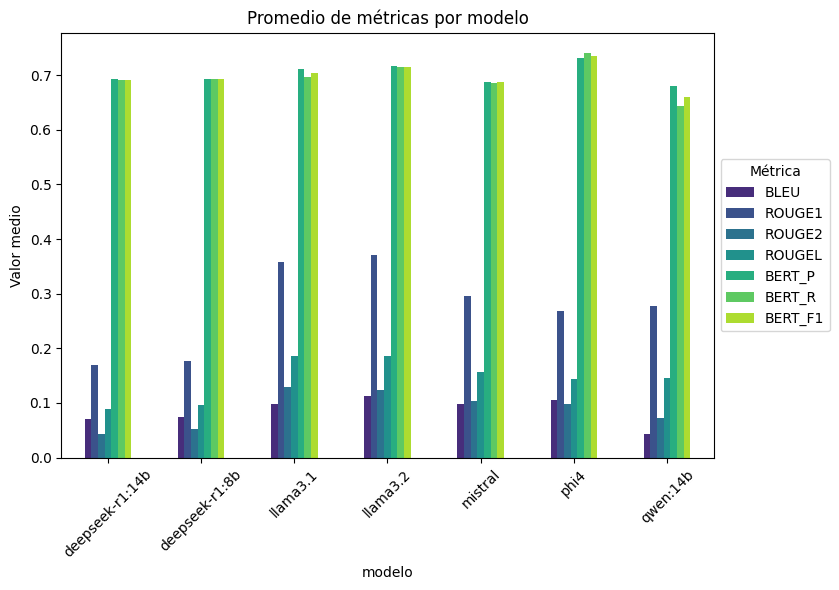

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

metricas = ['BLEU', 'ROUGE1', 'ROUGE2', 'ROUGEL', 'BERT_P', 'BERT_R', 'BERT_F1']
promedios_modelos = resultados.groupby("modelo")[metricas].mean().reset_index()

# Obtener la paleta 'rocket'
colores = sns.color_palette("viridis", n_colors=len(metricas))

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el gráfico de barras con colores personalizados
promedios_modelos.set_index("modelo").plot(kind="bar", ax=ax, color=colores)

# Personalización
ax.set_title("Promedio de métricas por modelo")
ax.set_ylabel("Valor medio")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Mover la leyenda fuera del gráfico
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Métrica")

# Ajustar layout para que no se corte
plt.tight_layout(rect=[0, 0, 0.85, 1])  # deja espacio a la derecha
plt.savefig("metricas_por_modelo.png", bbox_inches='tight', dpi=300)
plt.show()



In [4]:
tabla_medias = resultados.groupby("temperatura")[metricas].mean().round(3)
# Redondeamos a 3 decimales
tabla_latex = tabla_medias.round(3)
# Exportar a LaTeX directamente
print(tabla_latex.to_latex(
    caption="Media de las métricas por temperatura",
    label="tab:metricas_temperatura",
    index_names=False,
    column_format="l" + "c" * len(metricas),
    escape=False
))



\begin{table}
\caption{Media de las métricas por temperatura}
\label{tab:metricas_temperatura}
\begin{tabular}{lccccccc}
\toprule
 & BLEU & ROUGE1 & ROUGE2 & ROUGEL & BERT_P & BERT_R & BERT_F1 \\
\midrule
0.2 & 0.087000 & 0.271000 & 0.089000 & 0.143000 & 0.703000 & 0.696000 & 0.699000 \\
0.8 & 0.085000 & 0.277000 & 0.088000 & 0.144000 & 0.701000 & 0.694000 & 0.697000 \\
\bottomrule
\end{tabular}
\end{table}



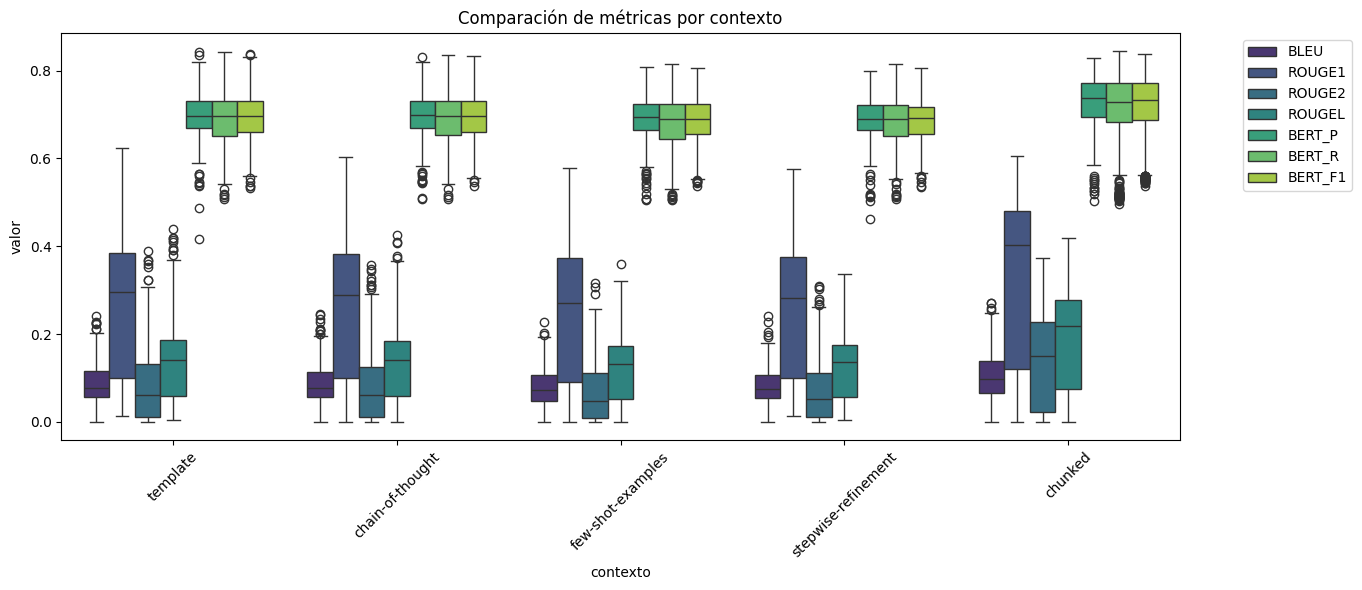

In [5]:

# Transformar los datos
melted = pd.melt(resultados, id_vars=["contexto"], value_vars=metricas,
                 var_name="métrica", value_name="valor")

# Crear el boxplot con la paleta 'rocket'
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=melted,
    x="contexto",
    y="valor",
    hue="métrica",
    palette=sns.color_palette("viridis", n_colors=len(metricas))
)

# Personalización
plt.title("Comparación de métricas por contexto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Guardar la figura
plt.savefig("metricas_por_contexto.png", bbox_inches='tight', dpi=300)
# Mostrar la figura
plt.show()


/tmp/ipykernel_201356/1808045767.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  heatmap_deepseek = heatmap_deepseek.stack(level=0).unstack(level=0)
/tmp/ipykernel_201356/1808045767.py:14: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  heatmap_otros = heatmap_otros.stack(level=0).unstack(level=0)


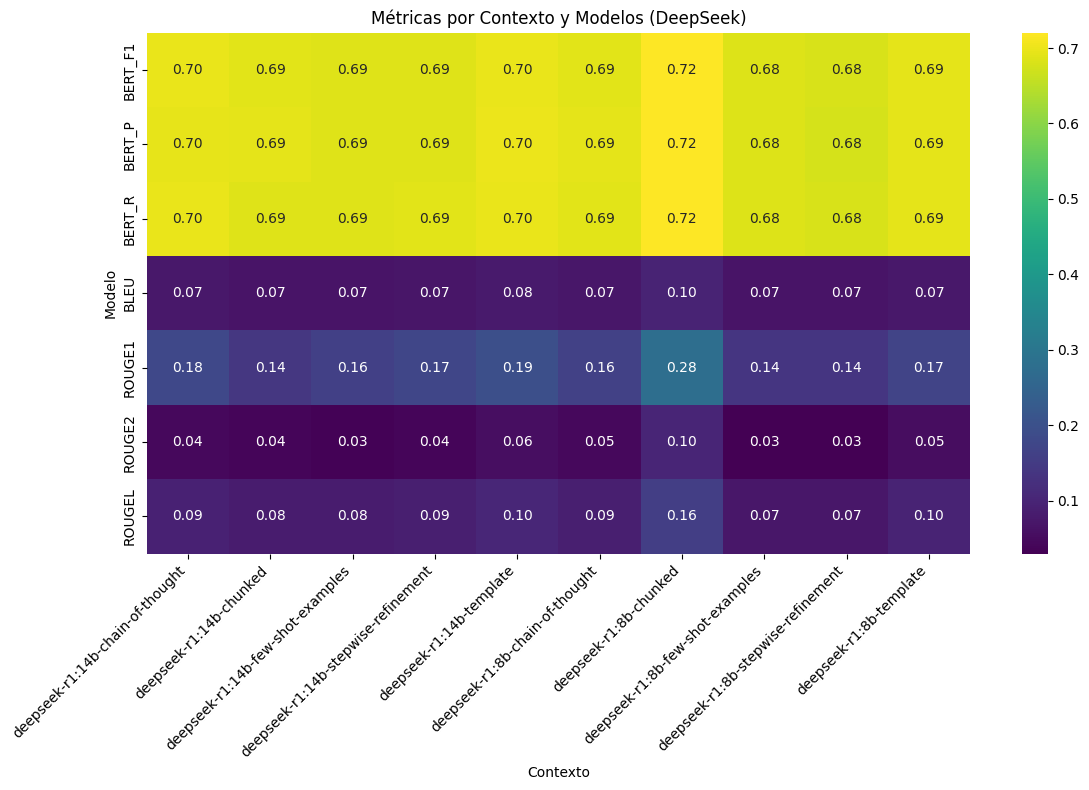

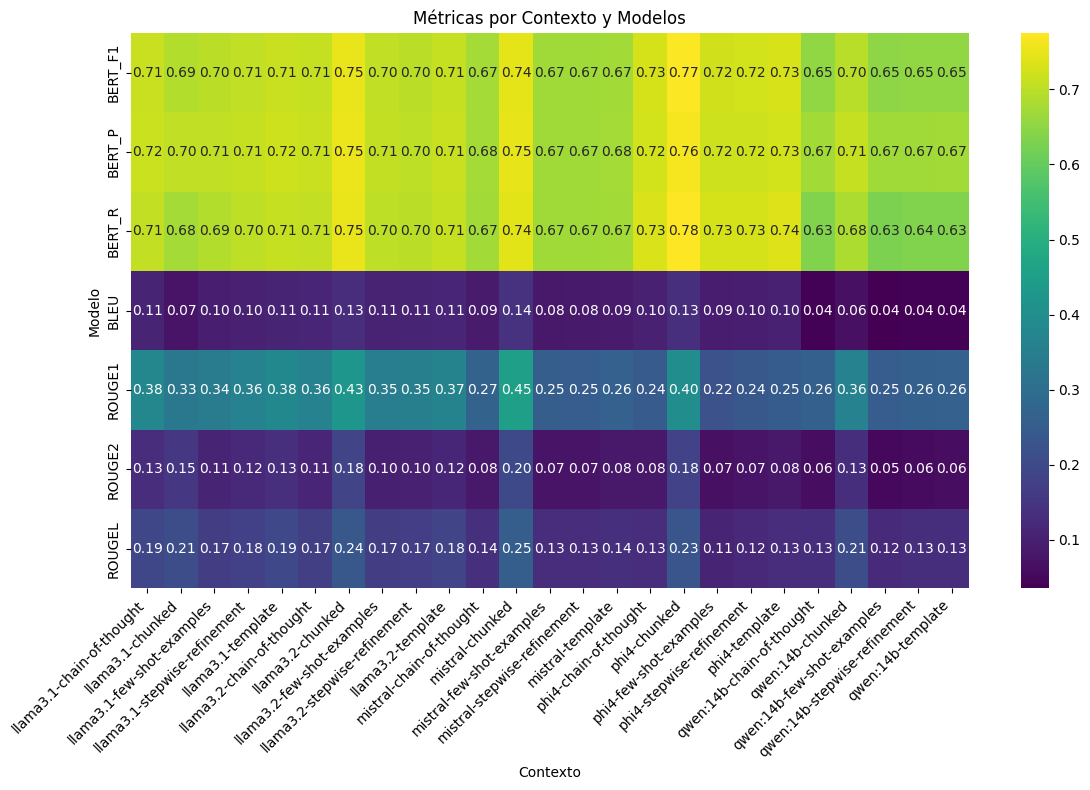

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir el dataframe en dos: uno para modelos que empiezan con "deepseek" y otro para los demás
modelos_deepseek = resultados[resultados["modelo"].str.startswith("deepseek")]
otros_modelos = resultados[~resultados["modelo"].str.startswith("deepseek")]

# Crear un heatmap para los modelos que empiezan con "deepseek"
heatmap_deepseek = modelos_deepseek.groupby(['contexto', 'modelo'])[metricas].mean().unstack(fill_value=0)
heatmap_deepseek = heatmap_deepseek.stack(level=0).unstack(level=0)

# Crear un heatmap para los demás modelos
heatmap_otros = otros_modelos.groupby(['contexto', 'modelo'])[metricas].mean().unstack(fill_value=0)
heatmap_otros = heatmap_otros.stack(level=0).unstack(level=0)

# Heatmap para los modelos "deepseek" con paleta 'rocket'
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_deepseek, annot=True, fmt=".2f", cmap=sns.color_palette("viridis", as_cmap=True), cbar=True)
plt.title("Métricas por Contexto y Modelos (DeepSeek)")
plt.ylabel("Modelo")
plt.xlabel("Contexto")
plt.xticks(rotation=45, ha='right')  # Rotamos y alineamos las etiquetas
plt.tight_layout()  # Ajuste para evitar que se solapen
# Guardar la figura
plt.savefig("metricas_por_contexto_deepseek.png", bbox_inches='tight', dpi=300)
plt.show()

# Heatmap para los demás modelos con paleta 'rocket'
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_otros, annot=True, fmt=".2f", cmap=sns.color_palette("viridis", as_cmap=True), cbar=True)
plt.title("Métricas por Contexto y Modelos")
plt.ylabel("Modelo")
plt.xlabel("Contexto")
plt.xticks(rotation=45, ha='right')  # Rotamos y alineamos las etiquetas
plt.tight_layout()  # Ajuste para evitar que se solapen
# Guardar la figura
plt.savefig("metricas_por_contexto_modelos.png", bbox_inches='tight', dpi=300)
plt.show()


